<a href="https://colab.research.google.com/github/mark1702/mark/blob/master/hoc_may_thong_ke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the and function

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

In [ ]:
for i in range(len(X)):
    print(X[i], y[i])

[0 0] 0
[0 1] 0
[1 0] 0
[1 1] 1


In [ ]:
def add_noise_data(input_data, input_labels, n_points, mean, scale):
    """
    Create a noise verstion of the input data

    Params:
        input_data: base input data
        input_labels: base input labels
        n_points: the number of needed points
        mean, scale: the gaussian data
    """
    raw_X = []
    raw_labels = []

    noise = np.random.normal(loc=mean, scale=scale, size=(n_points, 2))
    for i in range(n_points):
        k = np.random.randint(len(input_data))

        raw_X.append([input_data[k][0] + noise[i][0],
                      input_data[k][1] + noise[i][1]])

        raw_labels.append(input_labels[k])

    return np.array(raw_X), np.array(raw_labels)

In [ ]:
X_noise, y_noise = add_noise_data(X, y, 100, 0., 0.2)

In [ ]:
def plot_clusters(_x, labels, std, list_labels = ['False', 'True']):
    colors = ['#4EACC5', '#FF9C34']
    y_m = labels
    for k, col in zip(range(len(labels)), colors):
        my_members = y_m == k
        print(_x[my_members].shape)
        plt.scatter(_x[my_members, 0], _x[my_members, 1], marker='o', label = list_labels[k])
    plt.title('Noisy AND dataset with std = %.1f' % std)
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

(76, 2)
(24, 2)


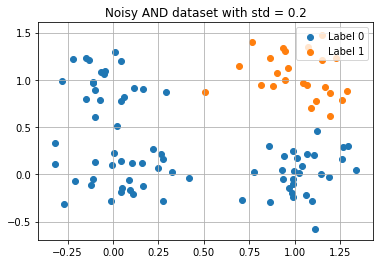

In [ ]:
plot_clusters(X_noise, y_noise, 0.2, list_labels=['Label 0', 'Label 1'])

(73, 2)
(27, 2)


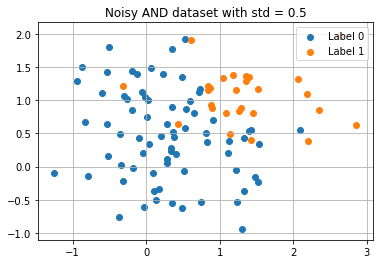

In [ ]:
X_high_noise, y_high_noise = add_noise_data(X, y, 100, 0., 0.5)
plot_clusters(X_high_noise, y_high_noise, 0.5, list_labels=['Label 0', 'Label 1'])

In [ ]:
for i in range(20):
    print('(%.1f, %.1f)' % (X_high_noise[i][0], X_high_noise[i][1]), y_high_noise[i])

(0.9, -1.0) 0
(-0.6, 0.8) 0
(0.0, 0.3) 0
(1.6, 0.9) 1
(1.2, 0.9) 0
(-0.1, -0.1) 0
(1.4, 1.0) 0
(0.0, -0.3) 0
(0.7, 0.1) 0
(1.5, 0.2) 0
(0.4, 0.4) 0
(0.6, 1.4) 1
(-0.0, 2.0) 0
(-0.5, -0.6) 0
(0.1, -0.0) 0
(0.3, 0.8) 0
(-0.2, 0.3) 0
(0.4, 0.8) 0
(0.6, 0.4) 0
(1.7, 1.1) 1
